In [1]:
## check availability of GPU (nvidia-smi)
import os
os.environ["CUDA_VISIBLE_DEVICES"]="5"

In [2]:
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: Tesla V100-SXM2-32GB, compute capability 7.0


In [3]:
import warnings
warnings.filterwarnings("ignore")

import os 
import glob

current_dir = "/mnt/akoustos/"

data_dir = current_dir + "Data/"
labeled_data_dir = data_dir + 'Labeled_Data/'
audio_dir = data_dir + "Raw_Audio/"

spectrogram_dir = data_dir + "Extracted_Spectrogram/"
if not os.path.exists(spectrogram_dir):
    os.makedirs(spectrogram_dir)


In [4]:
from src.data_split import Data_Split
categories = ['25']  ## regard the remaining labeled detections with other labels as "non-category" (i.e., negatives)
data = Data_Split.data_split(categories, spectrogram_dir, include_no_label_category = False)
print(data.head(10))

   label  Count  Percentage
0      0   1790       78.17
1      1    500       21.83
Size of train, val, test dataset: 1602 344 344
Percentage of train, val, test dataset: 70.0% 15.0% 15.0%
                                            filename  label  split
0  /mnt/akoustos/Data/Extracted_Spectrogram/proje...      0  train
1  /mnt/akoustos/Data/Extracted_Spectrogram/proje...      0  train
2  /mnt/akoustos/Data/Extracted_Spectrogram/proje...      1  train
3  /mnt/akoustos/Data/Extracted_Spectrogram/proje...      1  train
4  /mnt/akoustos/Data/Extracted_Spectrogram/proje...      1  train
5  /mnt/akoustos/Data/Extracted_Spectrogram/proje...      0    val
6  /mnt/akoustos/Data/Extracted_Spectrogram/proje...      1   test
7  /mnt/akoustos/Data/Extracted_Spectrogram/proje...      0    val
8  /mnt/akoustos/Data/Extracted_Spectrogram/proje...      1  train
9  /mnt/akoustos/Data/Extracted_Spectrogram/proje...      1  train


### Train with a Customized CNN 


Please choose one model from the available models: Customized_CNN, Resnet18, Resnet34, Resnet50, Resnet101, Resnet152, Alexnet, VGG11, VGG13, VGG16, VGG19, Densenet121, Densenet169, Densenet201, Squeezenet1_0.
Begin training.
Epoch 01: | Train Loss: 86.71313 | Val Loss: 83.60847 | Train Acc: 0.679| Val Acc: 0.735
Epoch 02: | Train Loss: 14.90463 | Val Loss: 3.70620 | Train Acc: 0.714| Val Acc: 0.887
Epoch 03: | Train Loss: 6.25858 | Val Loss: 3.32549 | Train Acc: 0.797| Val Acc: 0.811
Epoch 04: | Train Loss: 3.69762 | Val Loss: 7.14390 | Train Acc: 0.833| Val Acc: 0.738
Epoch 05: | Train Loss: 5.18555 | Val Loss: 1.97215 | Train Acc: 0.846| Val Acc: 0.875
Epoch 06: | Train Loss: 2.19431 | Val Loss: 2.24898 | Train Acc: 0.875| Val Acc: 0.814
Epoch 07: | Train Loss: 2.11179 | Val Loss: 1.13282 | Train Acc: 0.870| Val Acc: 0.895
Epoch 08: | Train Loss: 0.85488 | Val Loss: 0.40297 | Train Acc: 0.888| Val Acc: 0.919
Epoch 09: | Train Loss: 0.36010 | Val Loss: 0.26216 | Train Acc: 0.905| Va

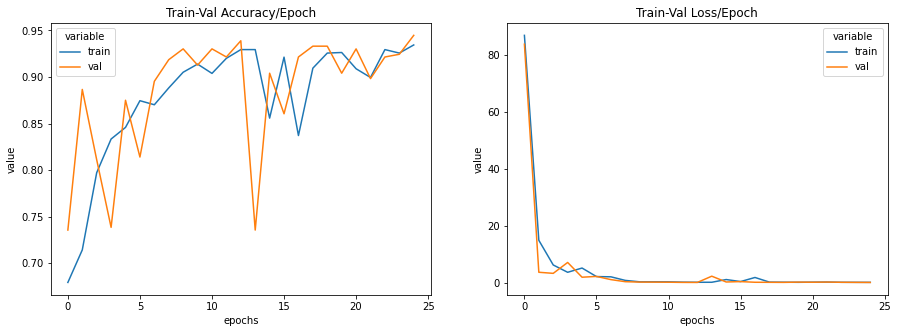

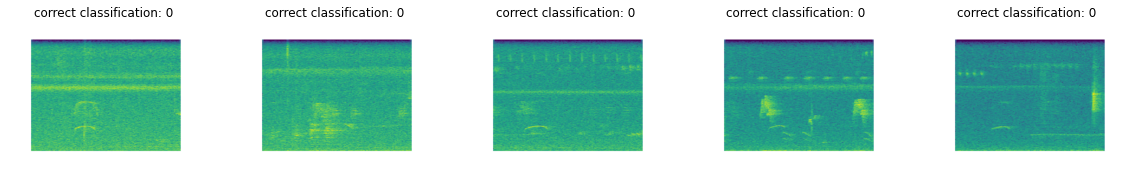

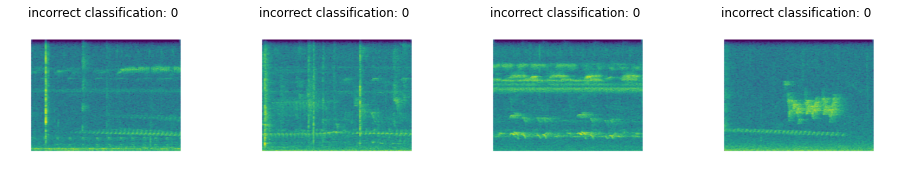

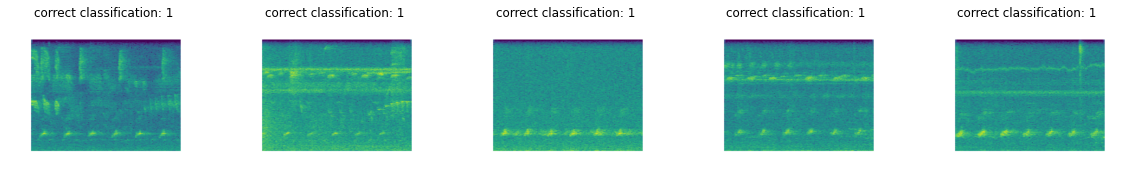

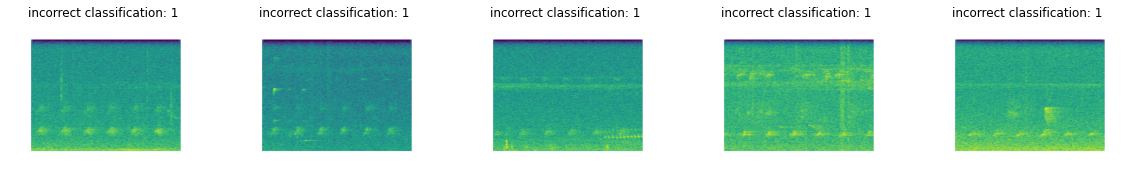

In [6]:
from src.model.binary_classification import binary_classification_models
model = binary_classification_models.train_model(data = data, 
                                                 model_name = 'Customized_CNN', 
                                                 batch_size = 32,  
                                                 optimizer = 'Adam', 
                                                 learning_rate = 0.008, 
                                                 lr_decay = False, 
                                                 num_epochs = 25)


### Fine-tune a pre-trained model


Please choose one model from the available models: Customized_CNN, Resnet18, Resnet34, Resnet50, Resnet101, Resnet152, Alexnet, VGG11, VGG13, VGG16, VGG19, Densenet121, Densenet169, Densenet201, Squeezenet1_0.
Begin training.
Epoch 01: | Train Loss: 0.69235 | Val Loss: 0.12115 | Train Acc: 0.875| Val Acc: 0.971
Epoch 02: | Train Loss: 0.23961 | Val Loss: 0.12410 | Train Acc: 0.934| Val Acc: 0.965
Epoch 03: | Train Loss: 0.24893 | Val Loss: 0.12693 | Train Acc: 0.931| Val Acc: 0.968
Epoch 04: | Train Loss: 0.25052 | Val Loss: 0.11910 | Train Acc: 0.927| Val Acc: 0.974
Epoch 05: | Train Loss: 0.23007 | Val Loss: 0.12502 | Train Acc: 0.938| Val Acc: 0.971
Epoch 06: | Train Loss: 0.25849 | Val Loss: 0.13747 | Train Acc: 0.932| Val Acc: 0.962
Epoch 07: | Train Loss: 0.24661 | Val Loss: 0.12378 | Train Acc: 0.932| Val Acc: 0.968
Epoch 08: | Train Loss: 0.23568 | Val Loss: 0.12262 | Train Acc: 0.931| Val Acc: 0.971
Epoch 09: | Train Loss: 0.22769 | Val Loss: 0.12260 | Train Acc: 0.938| Val A

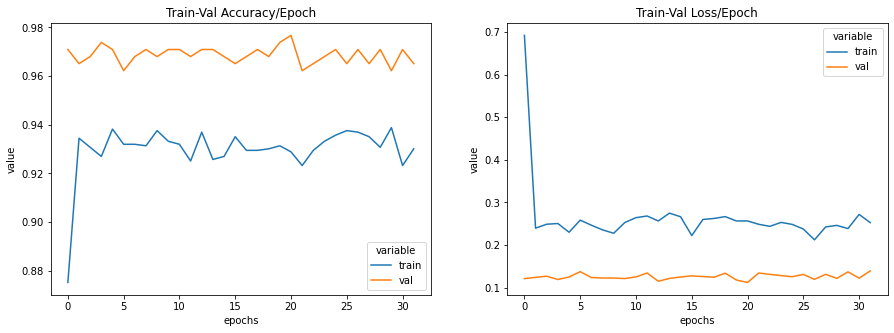

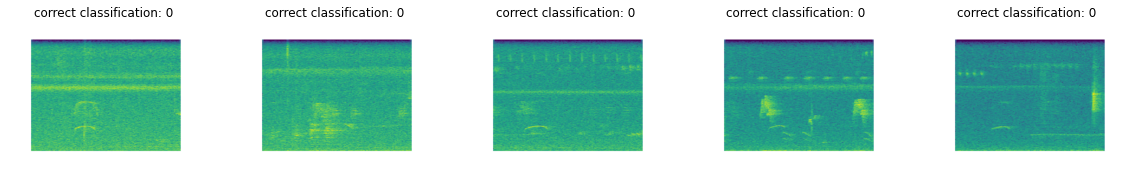

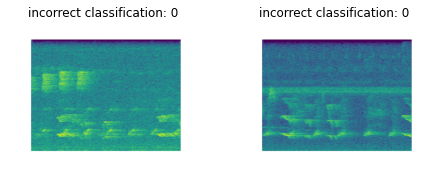

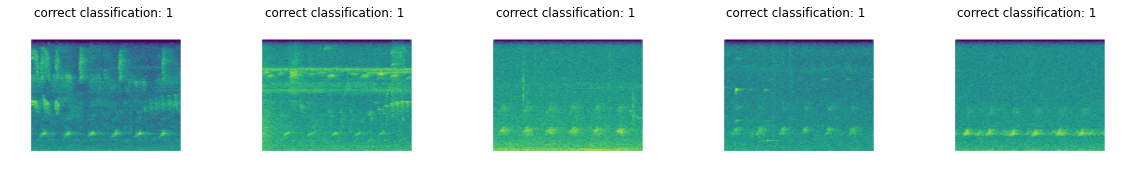

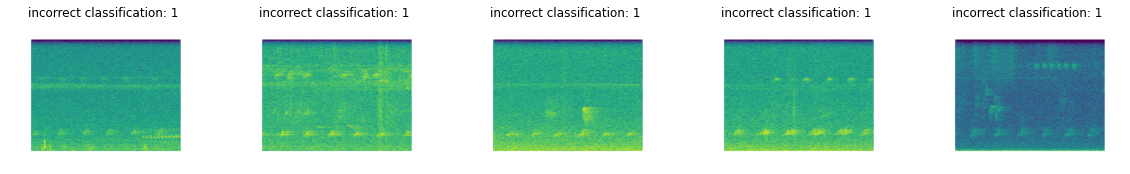

In [7]:
from src.model.binary_classification import binary_classification_models
model = binary_classification_models.train_model(data = data, 
                                                 model_name = 'Resnet50', 
                                                 batch_size = 32, 
                                                 pretrained = True, 
                                                 optimizer = 'Adam', 
                                                 learning_rate = 0.001, 
                                                 lr_decay = True, 
                                                 num_epochs = 32)